In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/cookie_ratings.csv',index_col=0)
# Isolate cookie columns
cookie_cols = df.columns
cookie_cols = cookie_cols.drop('Digital Safety')

In [3]:
# Cookie rankings dict
cookie_ratings = {} # Key: Cookie, Val: (mean, std, # ratings)
for col in df[cookie_cols]:
    cookie_ratings[col] = (df[col].mean(),df[col].std(), df[col].count())
cookie_ratings

{'Do-si-do': (6.4411764705882355, 2.164214298402948, 17),
 "S'mores": (5.653846153846154, 1.573009527739414, 13),
 'Samoas': (7.636363636363637, 1.8846612565519707, 22),
 'Savannah Smile': (6.25, 2.3918933601132486, 14),
 'Tagalong': (6.375, 1.970617500514327, 16),
 'Thin Mint': (7.305555555555555, 1.7332296349071181, 18),
 'Toffee-tastic': (5.055555555555555, 1.7977836754712315, 18),
 'Trefoil': (5.888888888888889, 1.6409785061104063, 18)}

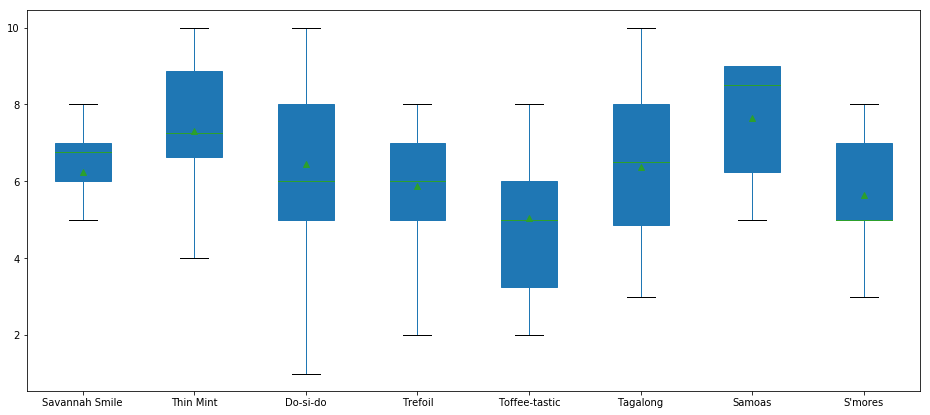

In [6]:
# Plotting Cookie Rankings
import matplotlib.pyplot as plt
df.boxplot(column=list(cookie_cols),showfliers=False,showmeans=True,figsize=(16,7),grid=False,patch_artist=True)



In [7]:
# Adding 'User Average' and 'Rating Count' cols
df['User Average'] = df[cookie_cols].mean(axis=1)
df['Rating Count'] = df[cookie_cols].notna().sum(axis=1)
df


,Savannah Smile,Thin Mint,Do-si-do,Trefoil,Toffee-tastic,Tagalong,Samoas,S'mores,Digital Safety,User Average,Rating Count
Name,,,,,,,,,,,
Chris,6.5,6.0,7.5,7.0,5.0,8.0,9.0,7.0,True,7.000000,8
Colleen,8.0,9.0,6.0,5.0,5.0,7.0,8.5,5.0,True,6.687500,8
Derek,6.0,9.0,6.0,5.0,3.0,8.0,9.0,5.0,True,6.375000,8
Kevin,7.0,4.0,NaN,8.0,6.0,NaN,9.0,NaN,True,6.800000,5
Vi,NaN,NaN,NaN,NaN,5.0,NaN,NaN,6.0,True,5.500000,2
Shashin,NaN,NaN,NaN,NaN,7.0,NaN,9.0,NaN,True,8.000000,2
Maggie,6.0,NaN,NaN,NaN,6.0,NaN,8.0,NaN,True,6.666667,3
Brandon,7.0,NaN,NaN,NaN,5.0,8.0,6.0,8.0,True,6.800000,5
Amanda,7.0,NaN,NaN,NaN,3.0,NaN,9.0,NaN,True,6.333333,3


In [10]:
# Summary of Cookie Statistics
df.describe().round(2) # because Python

,Savannah Smile,Thin Mint,Do-si-do,Trefoil,Toffee-tastic,Tagalong,Samoas,S'mores,User Average,Rating Count
count,14.00,18.00,17.00,18.00,18.00,16.00,22.00,13.00,23.00,23.00
mean,6.25,7.31,6.44,5.89,5.06,6.38,7.64,5.65,6.50,5.91
std,2.39,1.73,2.16,1.64,1.80,1.97,1.88,1.57,0.86,2.09
min,1.00,4.00,1.00,2.00,2.00,3.00,2.00,3.00,5.00,2.00
25%,6.00,6.62,5.00,5.00,3.25,4.88,6.25,5.00,5.94,5.00
50%,6.75,7.25,6.00,6.00,5.00,6.50,8.50,5.00,6.67,6.00
75%,7.00,8.88,8.00,7.00,6.00,8.00,9.00,7.00,6.92,8.00
max,10.00,10.00,10.00,8.00,8.00,10.00,9.00,8.00,8.00,8.00


In [11]:
# Isolating only the digital safety members
ds_df = df[df['Digital Safety']][['User Average','Rating Count']]
ds_df

,User Average,Rating Count
Name,,
Chris,7.000000,8
Colleen,6.687500,8
Derek,6.375000,8
Kevin,6.800000,5
Vi,5.500000,2
Shashin,8.000000,2
Maggie,6.666667,3
Brandon,6.800000,5
Amanda,6.333333,3


In [8]:
# Pretty Output
df.fillna('-', inplace=True)
df

,Savannah Smile,Thin Mint,Do-si-do,Trefoil,Toffee-tastic,Tagalong,Samoas,S'mores,Digital Safety,User Average,Rating Count
Name,,,,,,,,,,,
Chris,6.5,6,7.5,7,5,8,9,7,True,7.000000,8
Colleen,8,9,6,5,5,7,8.5,5,True,6.687500,8
Derek,6,9,6,5,3,8,9,5,True,6.375000,8
Kevin,7,4,-,8,6,-,9,-,True,6.800000,5
Vi,-,-,-,-,5,-,-,6,True,5.500000,2
Shashin,-,-,-,-,7,-,9,-,True,8.000000,2
Maggie,6,-,-,-,6,-,8,-,True,6.666667,3
Brandon,7,-,-,-,5,8,6,8,True,6.800000,5
Amanda,7,-,-,-,3,-,9,-,True,6.333333,3
